## BERT fake news prediction
Data: ISOT Fake News [dataset](https://www.uvic.ca/engineering/ece/isot/datasets/fake-news/index.php)

### Load libraries

In [14]:
import random
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# helper functions
from helper_functions import *

# welch's t-test
import scipy.stats as stats

### Load data

In [2]:
path = '../data/BERT_fake_news/pred_bert_1.csv'
df_pred = pd.read_csv(path)

# edit column names
df_pred.columns = ['text','predicted_class','true_class']

# Calculating the errors with the absolute value 
df_pred['errors'] = abs(df_pred['predicted_class'] - df_pred['true_class'])

df_pred.head()

,text,predicted_class,true_class,errors
0,apec photo of the day. rt @marc_leibowitz: pho...,0,0,0
1,developing news: soldier shot at war memorial....,0,0,0
2,r.i.p to roger rodas who died alongside paul w...,0,0,0
3,"we are running out of chocolate, warns world's...",0,0,0
4,fact: florida state university shooter's last ...,0,1,1


### Add features to data

In [3]:
path_feat = '../data/BERT_fake_news/Twitter_data/twitter_full.csv'

df_feat = pd.read_csv(path_feat)
df_feat.head(2)

,file_name,#followers,user_engagement,verified,depth,user_id1,tweet_id1,t1,user_id2,t2,veracity,resp_time,retw_prob,length,#hashs,#mentions,#URLs,sentiment_score,text,label
0,489800427152879616,15375121,72.567469,1,0.0,ROOT,489800427152879616,0.0,2467791,0.0,0,0.0,0.000031,95,0,0,2,-0.3182,malaysia airlines says it lost contact with pl...,1
1,560474897013415936,3673898,55.294333,1,0.0,ROOT,560474897013415936,0.0,59553554,0.0,0,0.0,0.000032,118,0,1,1,0.8398,for just $1 you can get a free jr. frosty with...,1


### Data cleaning

In [4]:
df_full = pd.merge(df_pred, df_feat, on=['text'])

# remove certain columns
df_full = df_full.drop(columns=['file_name', 'tweet_id1', 'depth', 't1', 't2', 'resp_time', 'user_id1', 'user_id2','label'])

# features
features = df_full.drop(['text','predicted_class', 'true_class', 'errors'], axis=1)
features.head()

df_full.head()

,text,predicted_class,true_class,errors,#followers,user_engagement,verified,veracity,retw_prob,length,#hashs,#mentions,#URLs,sentiment_score
0,apec photo of the day. rt @marc_leibowitz: pho...,0,0,0,38637,15.010186,1,0,0.007092,107,0,1,1,0.0000
1,developing news: soldier shot at war memorial....,0,0,0,283032,8.955287,1,1,0.000329,99,0,0,2,-0.5994
2,r.i.p to roger rodas who died alongside paul w...,0,0,0,2427,91.487041,0,1,0.039143,55,0,0,1,-0.5574
3,"we are running out of chocolate, warns world's...",0,0,0,3161310,222.042612,1,0,0.000037,85,0,0,2,-0.1027
4,"we are running out of chocolate, warns world's...",0,0,0,3158014,221.933792,1,0,0.000033,85,0,0,2,-0.1027


### Data initialization

In [5]:
full_data = initialize_dataset(df_full,features)
full_data.head()

,#followers,user_engagement,verified,veracity,retw_prob,length,#hashs,#mentions,#URLs,sentiment_score,scaled_errors,predicted_class,true_class,errors,clusters,new_clusters
0,-0.471591,-0.617878,0.684291,-1.171236,-0.284624,0.623791,-0.468467,1.441731,-0.477262,0.206184,0.0,0,0,0,0,-1
1,-0.443019,-0.703439,0.684291,0.853799,-0.323626,0.276458,-0.468467,-0.372692,0.946826,-1.218897,0.0,0,0,0,0,-1
2,-0.475825,0.462801,-1.461367,0.853799,-0.099791,-1.633874,-0.468467,-0.372692,-0.477262,-1.119041,0.0,0,0,0,0,-1
3,-0.106519,2.307655,0.684291,-1.171236,-0.325309,-0.331375,-0.468467,-0.372692,0.946826,-0.037986,0.0,0,0,0,0,-1
4,-0.106905,2.306118,0.684291,-1.171236,-0.325331,-0.331375,-0.468467,-0.372692,0.946826,-0.037986,0.0,0,0,0,0,-1


### KMeans scan

In [6]:
clus_model_kwargs = {
    "n_clusters": 2,
    "init": "k-means++",
    "n_init": 20,
    "max_iter": 300,
    "random_state": 10,
}

In [7]:
# minimal splittable cluster size
split_cluster_size = round(0.05 * len(full_data))
print("minimal splittable cluster size: ", split_cluster_size)

# minimal acceptable cluster size
acc_cluster_size = round(0.03 * len(full_data))
print("minimal splitacceptabletable cluster size: ", acc_cluster_size)

minimal splittable cluster size:  9
minimal splitacceptabletable cluster size:  6


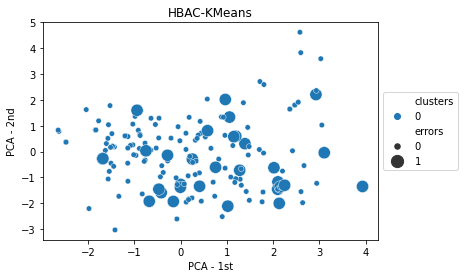

average_accuracy is:  0.827027027027027


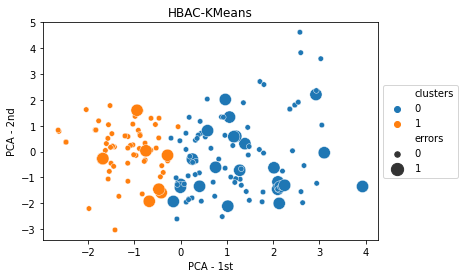

--> Cluster with the highest variance: 0


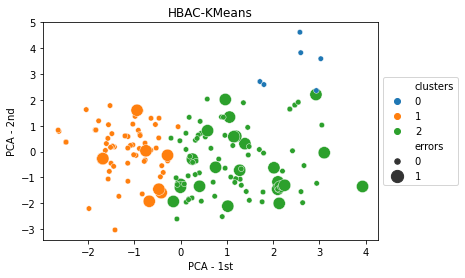

--> Cluster with the highest variance: 2


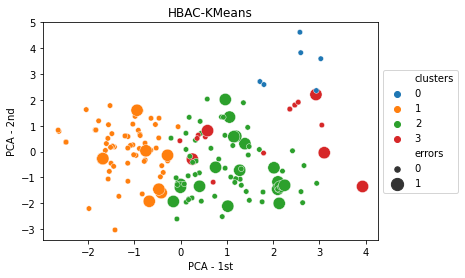

--> Cluster with the highest variance: 2
--> Cluster with the highest variance: 3


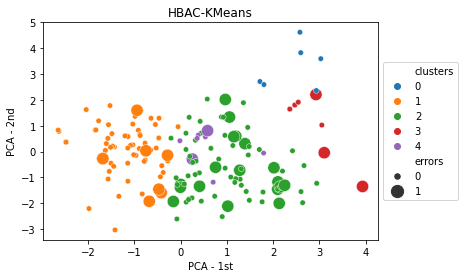

--> Cluster with the highest variance: 2
--> Cluster with the highest variance: 4
--> Cluster with the highest variance: 3


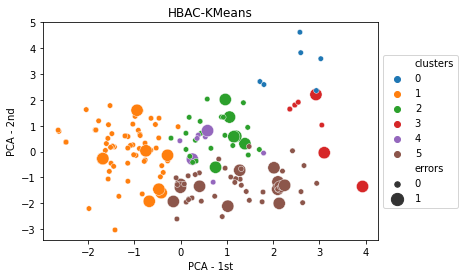

--> Cluster with the highest variance: 2
--> Cluster with the highest variance: 5
--> Cluster with the highest variance: 3


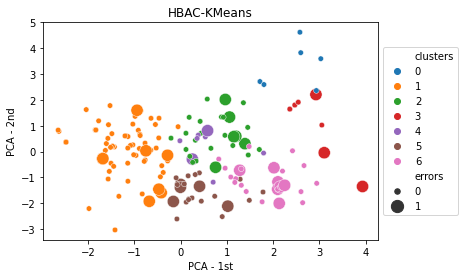

--> Cluster with the highest variance: 2
--> Cluster with the highest variance: 5
--> Cluster with the highest variance: 4
--> Cluster with the highest variance: 6
--> Cluster with the highest variance: 3


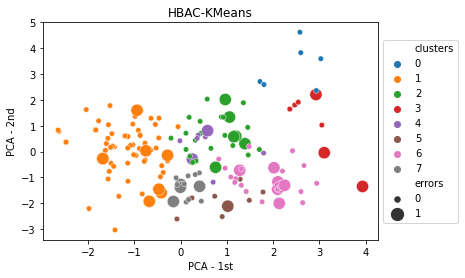

--> Cluster with the highest variance: 2
--> Cluster with the highest variance: 7
--> Cluster with the highest variance: 3


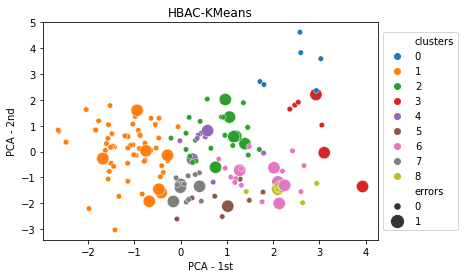

--> Cluster with the highest variance: 2
--> Cluster with the highest variance: 7
--> Cluster with the highest variance: 3
MAX_ITER
[0.017225407962694908, 0.021489387429325563, 0.01872646433503538, 0.017463854206568187, 0.017463854206568187, 0.014721029006528488, 0.014721029006528488, 0.014721029006528488, 0.014721029006528488, 0.013287793446065116, 0.013287793446065116, 0.013287793446065116, 0.013287793446065116, 0.013287793446065116, 0.013287793446065116, 0.013325983579152927, 0.013325983579152927, 0.01263011562950073]


In [8]:
MAX_ITER = 20
x = 0 # initial cluster number
initial_bias = 0
pca_plot(full_data)
variance_list = []
average_accuracy = accuracy(full_data)
minimal_splittable_cluster_size = 9
minimal_acceptable_cluster_size = 5
# minimal_splittable_cluster_size = round(0.05 * len(full_data))
# minimal_acceptable_cluster_size = round(0.03 * len(full_data))
print("average_accuracy is: ", average_accuracy) 

for i in range(1, MAX_ITER):
    if i != 1:
        variance_list.append(calculate_variance(full_data)) 
    full_data['new_clusters'] = -1
    candidate_cluster = full_data.loc[full_data['clusters'] == x] 

    if len(candidate_cluster) < minimal_splittable_cluster_size:
        x = get_random_cluster(full_data['clusters'])
        continue
    
    # Apply Kmeans 
    kmeans_algo = KMeans(**clus_model_kwargs).fit(candidate_cluster.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class', 'errors'], axis=1))
    
    candidate_cluster['new_clusters'] = pd.DataFrame(kmeans_algo.predict(candidate_cluster.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class', 'errors'], axis=1)),index=candidate_cluster.index) 
    full_data['new_clusters'] = candidate_cluster['new_clusters'].combine_first(full_data['new_clusters'])

    max_abs_bias = get_max_negative_bias(full_data) # was get_max_abs_bias, but now it only finds the discriminated clusters
    min_new_size = get_min_cluster_size(full_data)
    
    if (max_abs_bias <= initial_bias) & (min_new_size > minimal_acceptable_cluster_size): #abs: >
        # Add new cluster
        n_cluster = max(full_data['clusters'])
        full_data['clusters'][full_data['new_clusters'] == 1] =  n_cluster + 1
        
        pca_plot(full_data)
        x = get_next_cluster(full_data)
        initial_bias = max_abs_bias
    else:
        x = get_random_cluster(full_data['clusters'])
        
print('MAX_ITER')
print(variance_list)

### Analysing the clustering results

In [9]:
# Identifying highest biased cluster
c = get_max_bias_cluster(full_data)
# c = 3
highest_biased_cluster = full_data[full_data['clusters']==c]
len(highest_biased_cluster)

accuracy_full_data = accuracy(full_data)
most_biased_cluster_kmeans_aware = bias_acc(full_data, c, 'clusters')
full_data[full_data['clusters']==c]

print('General accuracy of classifier on this dataset:', accuracy_full_data)
# print('Number of clusters: ', full_data['clusters'].unique()) 
print(f"cluster {c} has the highest discrimination bias")
print(most_biased_cluster_kmeans_aware)

2 has bias -0.057665260196905765
1 has bias 0.1312456016889515
7 has bias -0.12197159565580618
5 has bias 0.05014124293785316
4 has bias -0.0805084745762712
6 has bias -0.11610113107119091
3 has bias -0.13428571428571434
0 has bias 0.17877094972067042
8 has bias -0.1171749598715891
General accuracy of classifier on this dataset: 0.827027027027027
cluster 3 has the highest discrimination bias
-0.13428571428571434


In [10]:
discriminated_cluster = full_data[full_data['clusters']==c]
print('Number of instances in discriminated cluster:', len(discriminated_cluster))
print('Number of errors in discriminated clusters: ', len(discriminated_cluster.loc[discriminated_cluster['errors']==1]))
discriminated_cluster

Number of instances in discriminated cluster: 10
Number of errors in discriminated clusters:  3


,#followers,user_engagement,verified,veracity,retw_prob,length,#hashs,#mentions,#URLs,sentiment_score,scaled_errors,predicted_class,true_class,errors,clusters,new_clusters
25,-0.476052,-0.724141,-1.461367,-1.171236,1.303181,0.276458,0.787568,5.070577,0.946826,0.206184,0.8,1,0,1,3,0.0
77,-0.461660,-0.688499,-1.461367,0.853799,-0.302935,1.101374,5.811710,3.256154,-0.477262,-0.605023,0.8,1,0,1,3,1.0
107,-0.476052,-0.724141,-1.461367,-1.171236,1.049827,1.057958,0.787568,1.441731,-0.477262,-1.766913,0.8,1,0,1,3,0.0
109,-0.476052,-0.724141,-1.461367,-1.171236,0.832667,0.406708,2.043604,3.256154,0.946826,-1.083141,0.0,1,1,0,3,0.0
140,-0.476052,-0.724141,-1.461367,-1.171236,0.832667,0.406708,0.787568,3.256154,0.946826,0.206184,0.0,1,1,0,3,0.0
141,-0.476052,-0.724141,-1.461367,-1.171236,1.194601,0.406708,0.787568,3.256154,0.946826,0.206184,0.0,1,1,0,3,0.0
142,-0.476052,-0.724141,-1.461367,-1.171236,1.447954,0.406708,0.787568,3.256154,0.946826,0.206184,0.0,1,1,0,3,0.0
143,-0.476052,-0.724141,-1.461367,-1.171236,0.832667,0.406708,0.787568,3.256154,0.946826,0.206184,0.0,0,0,0,3,0.0
144,-0.476052,-0.724141,-1.461367,-1.171236,1.194601,0.406708,0.787568,3.256154,0.946826,0.206184,0.0,0,0,0,3,0.0
145,-0.476052,-0.724141,-1.461367,-1.171236,1.447954,0.406708,0.787568,3.256154,0.946826,0.206184,0.0,0,0,0,3,0.0


In [11]:
not_discriminated = full_data[full_data['clusters']!=c]
difference = (discriminated_cluster.mean()) - (not_discriminated.mean()) 
difference

#followers        -0.501734
user_engagement   -0.761752
verified          -1.544874
veracity          -1.024089
retw_prob          1.039508
length             0.558462
#hashs             1.496477
#mentions          3.442220
#URLs              0.699838
sentiment_score   -0.212675
scaled_errors      0.107429
predicted_class    0.225714
true_class        -0.182857
errors             0.134286
clusters           0.285714
new_clusters       1.100000
dtype: float64

In [12]:
# unscaling the discriminated cluster
unscaled_discriminated = full_data.loc[discriminated_cluster.index, :]

# unscaled other data
unscaled_remaining = full_data.drop(discriminated_cluster.index)

display(unscaled_remaining.describe())
display(unscaled_discriminated.describe())

print(discriminated_cluster.index)

,#followers,user_engagement,verified,veracity,retw_prob,length,#hashs,#mentions,#URLs,sentiment_score,scaled_errors,predicted_class,true_class,errors,clusters,new_clusters
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.0
mean,0.027121,0.041176,0.083507,0.055356,-0.056190,-0.030187,-0.080891,-0.186066,-0.037829,0.011496,0.132571,0.474286,0.582857,0.165714,2.714286,-1.0
std,1.024467,1.015709,0.966162,0.992468,0.995473,1.020688,0.900002,0.617428,1.008932,1.017146,0.298313,0.500771,0.494502,0.372891,2.416079,0.0
min,-0.476100,-0.829978,-1.461367,-1.171236,-0.325500,-2.936373,-0.468467,-0.372692,-1.901351,-1.933814,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0
25%,-0.470594,-0.704625,-1.461367,-1.171236,-0.325269,-0.656999,-0.468467,-0.372692,-0.477262,-0.745534,0.000000,0.000000,0.000000,0.000000,1.000000,-1.0
50%,-0.414189,-0.374577,0.684291,0.853799,-0.323916,-0.027458,-0.468467,-0.372692,-0.477262,0.206184,0.000000,0.000000,1.000000,0.000000,1.000000,-1.0
75%,-0.107395,0.194302,0.684291,0.853799,-0.307918,0.580375,-0.468467,-0.372692,0.946826,0.975428,0.000000,1.000000,1.000000,0.000000,5.000000,-1.0
max,6.209670,2.307655,0.684291,0.853799,5.441289,2.056541,4.555675,3.256154,0.946826,2.122697,0.800000,1.000000,1.000000,1.000000,8.000000,-1.0


,#followers,user_engagement,verified,veracity,retw_prob,length,#hashs,#mentions,#URLs,sentiment_score,scaled_errors,predicted_class,true_class,errors,clusters,new_clusters
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000
mean,-0.474613,-0.720577,-1.461367,-0.968733,0.983318,0.528275,1.415586,3.256154,0.662009,-0.201179,0.240000,0.700000,0.400000,0.300000,3.0,0.100000
std,0.004551,0.011271,0.000000,0.640372,0.511026,0.293611,1.594280,0.855327,0.600448,0.711343,0.386437,0.483046,0.516398,0.483046,0.0,0.316228
min,-0.476052,-0.724141,-1.461367,-1.171236,-0.302935,0.276458,0.787568,1.441731,-0.477262,-1.766913,0.000000,0.000000,0.000000,0.000000,3.0,0.000000
25%,-0.476052,-0.724141,-1.461367,-1.171236,0.832667,0.406708,0.787568,3.256154,0.946826,-0.402221,0.000000,0.250000,0.000000,0.000000,3.0,0.000000
50%,-0.476052,-0.724141,-1.461367,-1.171236,1.122214,0.406708,0.787568,3.256154,0.946826,0.206184,0.000000,1.000000,0.000000,0.000000,3.0,0.000000
75%,-0.476052,-0.724141,-1.461367,-1.171236,1.276036,0.406708,0.787568,3.256154,0.946826,0.206184,0.600000,1.000000,1.000000,0.750000,3.0,0.000000
max,-0.461660,-0.688499,-1.461367,0.853799,1.447954,1.101374,5.811710,5.070577,0.946826,0.206184,0.800000,1.000000,1.000000,1.000000,3.0,1.000000


Int64Index([25, 77, 107, 109, 140, 141, 142, 143, 144, 145], dtype='int64')


In [13]:
unscaled_discriminated

,#followers,user_engagement,verified,veracity,retw_prob,length,#hashs,#mentions,#URLs,sentiment_score,scaled_errors,predicted_class,true_class,errors,clusters,new_clusters
25,-0.476052,-0.724141,-1.461367,-1.171236,1.303181,0.276458,0.787568,5.070577,0.946826,0.206184,0.8,1,0,1,3,0.0
77,-0.461660,-0.688499,-1.461367,0.853799,-0.302935,1.101374,5.811710,3.256154,-0.477262,-0.605023,0.8,1,0,1,3,1.0
107,-0.476052,-0.724141,-1.461367,-1.171236,1.049827,1.057958,0.787568,1.441731,-0.477262,-1.766913,0.8,1,0,1,3,0.0
109,-0.476052,-0.724141,-1.461367,-1.171236,0.832667,0.406708,2.043604,3.256154,0.946826,-1.083141,0.0,1,1,0,3,0.0
140,-0.476052,-0.724141,-1.461367,-1.171236,0.832667,0.406708,0.787568,3.256154,0.946826,0.206184,0.0,1,1,0,3,0.0
141,-0.476052,-0.724141,-1.461367,-1.171236,1.194601,0.406708,0.787568,3.256154,0.946826,0.206184,0.0,1,1,0,3,0.0
142,-0.476052,-0.724141,-1.461367,-1.171236,1.447954,0.406708,0.787568,3.256154,0.946826,0.206184,0.0,1,1,0,3,0.0
143,-0.476052,-0.724141,-1.461367,-1.171236,0.832667,0.406708,0.787568,3.256154,0.946826,0.206184,0.0,0,0,0,3,0.0
144,-0.476052,-0.724141,-1.461367,-1.171236,1.194601,0.406708,0.787568,3.256154,0.946826,0.206184,0.0,0,0,0,3,0.0
145,-0.476052,-0.724141,-1.461367,-1.171236,1.447954,0.406708,0.787568,3.256154,0.946826,0.206184,0.0,0,0,0,3,0.0


#### Statistical test to check 
Welch’s Two-Samples T-Test for Unequal Variances to examine whether the differences in means for each feature are statistically significant.

In [15]:
for i in unscaled_remaining:
    welch_i = stats.ttest_ind(unscaled_discriminated[i], unscaled_remaining[i], equal_var=False)
    print(i)
    print('this is the p-value:', welch_i.pvalue)

#followers
this is the p-value: 9.199340119310537e-10
user_engagement
this is the p-value: 1.1857717867315695e-18
verified
this is the p-value: 5.677661445680561e-50
veracity
this is the p-value: 0.0005214234297946138
retw_prob
this is the p-value: 5.361656466047912e-05
length
this is the p-value: 9.735843295251238e-05
#hashs
this is the p-value: 0.015833354862473656
#mentions
this is the p-value: 3.0348589728257693e-07
#URLs
this is the p-value: 0.005008384006011915
sentiment_score
this is the p-value: 0.3897780018965785
scaled_errors
this is the p-value: 0.40834114125475585
predicted_class
this is the p-value: 0.18161679398615008
true_class
this is the p-value: 0.30072184680809316
errors
this is the p-value: 0.4083411412547554
clusters
this is the p-value: 0.1195472945894115
new_clusters
this is the p-value: 1.6099324793935698e-06
